### 목표
- 머신러닝의 과정을 이해해보자
- AND 연산을 하는 pc(모델)을 만들어보자
- 파이썬 도구를 기억해보자

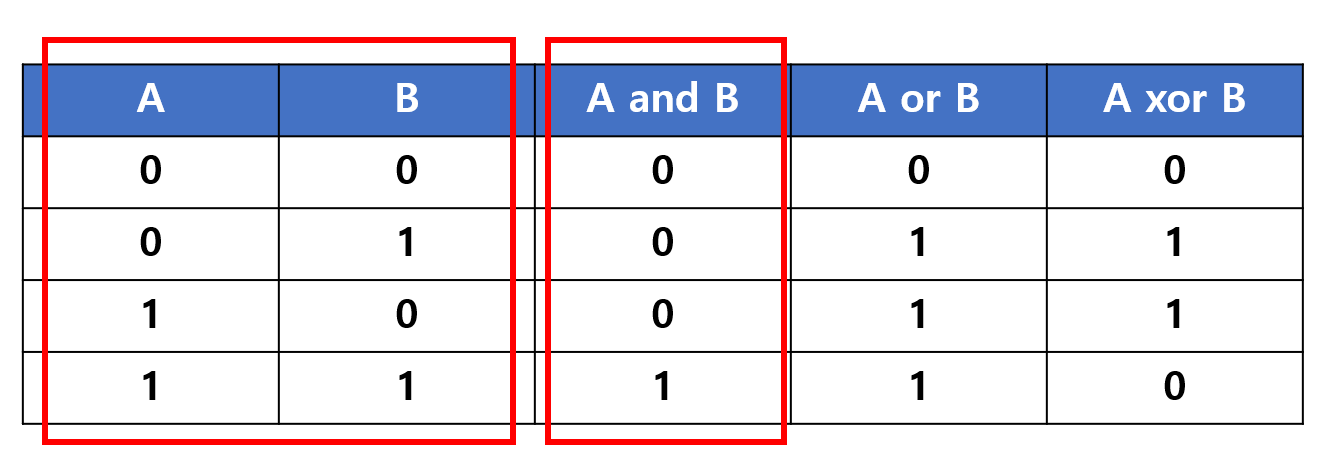

In [2]:
# 머신러닝 -> 기계학습
# 모델이 공부할 재료가 필요
# 데이터가 필요! 생성해보기

# 데이터 분석에 필요한 라이브러리 로딩
import numpy as np   # 파이썬의 수치계산용 라이브러리
import pandas as pd  # 데이터를 표 형태로 제공해주는 라이브러리
import matplotlib.pyplot as plt  # 데이터 시각화에 필요한 라이브러리

In [3]:
# df 생성하기
data = pd.DataFrame({'A':[0,0,1,1,1,0,1,0],
                    'B':[0,1,0,1,0,0,1,1],
                    'A and B':[0,0,0,1,0,0,1,0]})
data

,A,B,A and B
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1
4,1,0,0
5,0,0,0
6,1,1,1
7,0,1,0


- 데이터 분리

In [9]:
# 머신러닝
# 머신러닝 학습 유형에는 여러가지가 있다
# 1. 문제, 실제 답이 주어진 상태로 학습 : 지도학습(교사학습)
# 2. 문제, 실제 답이 주어지지 않은 상태로 학습 : 비지도학습(비교사학습)
# 3. 환경에 적응하면서 환경 데이터를 이해하고 행동을 강화해 나가는 학습 : 강화학습
# 문제, 답 데이터 구분(컬럼인덱싱)
X = data[['A', 'B']]  # 문제 데이터 (2차원 데이터라 문을 두 번 열어주기)
# data.loc[:, ['A', 'B']] , data.loc[:, 'A':'B']
# data.iloc[:, [0,1]] , data.iloc[:, 0:2] 
y = data['A and B']   # 답 데이터
print('문제 : ', X.shape)  # 행 8, 열 2
print('답 : ', y.shape)    # 요소 8

문제 :  (8, 2)
답 :  (8,)


In [11]:
# 학습데이터 X, y에서 0~5번째(포함) 행까지 슬라이싱
X_train = X.loc[:5]  # X.iloc[:6]
y_train = y.loc[:5]  # y.iloc[:6]

# 예측(테스트)데이터 X,y에서 6~7번째(포함) 행까지 슬라이싱
X_test = X.loc[6:]
y_test = y.loc[6:]

# 크기 확인
print('학습시킬 데이터 : ', X_train.shape, y_train.shape)
print('예측할 데이터 : ', X_test.shape, y_test.shape)

학습시킬 데이터 :  (6, 2) (6,)
예측할 데이터 :  (2, 2) (2,)


- Machine Learning 모델 학습하기
    - 여러 개의 종류 중 하나인 knn 모델을 불러와서 사용

In [12]:
from sklearn.neighbors import KNeighborsClassifier
# knn 모델의 분류 학습을 진행하는 모델
# 0, 1 카테고리 중 1개만 예측 -> 분류

In [13]:
# 모델 생성
knn_model = KNeighborsClassifier(n_neighbors = 1)

In [14]:
# 모델 학습
# 학습할 때 사용하는 함수 fit
# knn_model.fit(학습문제, 학습답)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
X_test

,A,B
6,1,1
7,0,1


In [16]:
# 평가 및 예측
# 예측 시켜보기
# knn_model.predict(예측(테스트)데이터)
knn_model.predict(X_test)
# 만약 예측해야할 답데이터가 100만 건이라면?

array([1, 0], dtype=int64)

In [17]:
# 평가를 할 도구 = score
knn_model.score(X_test, y_test) # 답이 맞았는지 체점하는 단계 
# 1.0에 가까울수록 예측한 답이 실제 답과 유사하다라는 뜻

1.0